<a href="https://colab.research.google.com/github/DiyaSReddy/EDA/blob/main/EDA_Major_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Uber-Jan-Feb-FOIL.csv to Uber-Jan-Feb-FOIL.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving other-American_B01362.csv to other-American_B01362.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving other-Dial7_B00887.csv to other-Dial7_B00887.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
file_path = '/content/Uber-Jan-Feb-FOIL.csv'
df = pd.read_csv(file_path)

In [ ]:
file_path = '/content/other-American_B01362.csv'
df1 = pd.read_csv(file_path)

In [ ]:
file_path = '/content/other-Dial7_B00887.csv'
df2 = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


1. Distribution of ride requests per hour/day

<ipython-input-21-3bb4e59871c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')


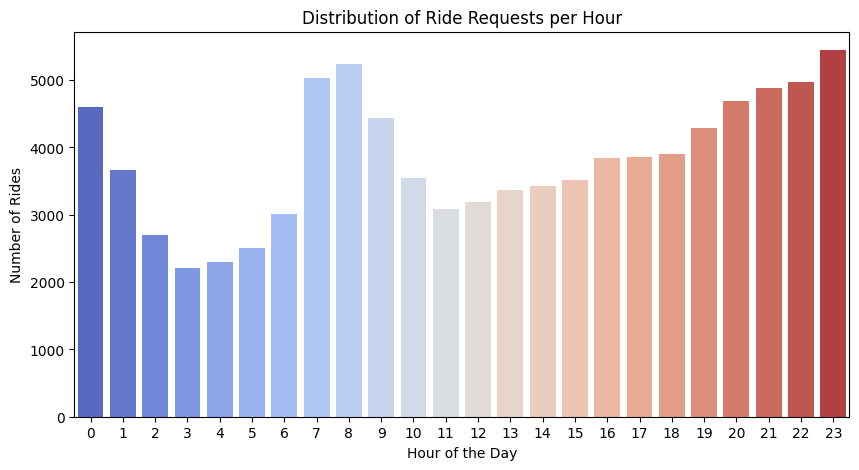

In [ ]:
df1['TIME'] = pd.to_datetime(df1['TIME'], errors='coerce')
df1['hour'] = df1['TIME'].dt.hour
hour_counts = df1['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm')
plt.title('Distribution of Ride Requests per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(24))
plt.show()

<ipython-input-22-a25e17a90cb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


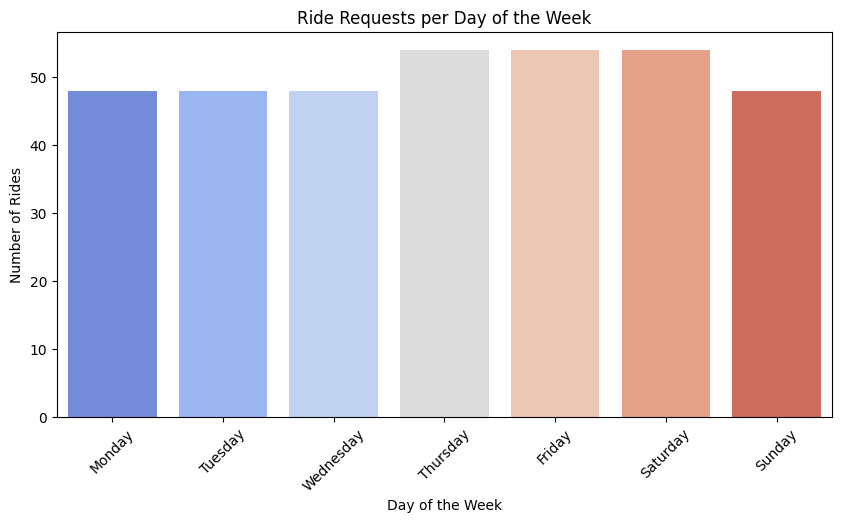

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Ride Requests per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

2. Peak times and locations

In [ ]:
peak_hour = hour_counts.idxmax()
peak_rides = hour_counts.max()
print(f"Peak ride hour: {peak_hour}:00 with {peak_rides} rides.")

Peak ride hour: 23:00 with 5446 rides.


In [ ]:
print(df2.columns)

Index(['Date', 'Time', 'State', 'PuFrom', 'Address', 'Street'], dtype='object')


In [ ]:
peak_location = df2['PuFrom'].value_counts().idxmax()
peak_rides_location = df2['PuFrom'].value_counts().max()
print(f"Peak pickup location: {peak_location} with {peak_rides_location} rides.")

Peak pickup location: MANHATTAN with 113625 rides.


3. Ride distance vs. fare analysis. Columns not available in datset

4.Most active zones for pickup

<ipython-input-32-e4c31d2e147d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df2['PuFrom'], order=df2['PuFrom'].value_counts().index[:5], palette='coolwarm')


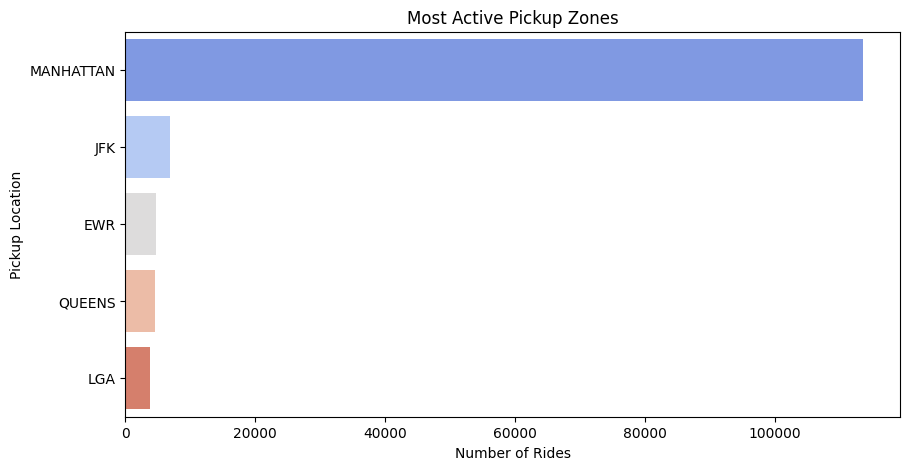

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df2['PuFrom'], order=df2['PuFrom'].value_counts().index[:5], palette='coolwarm')
plt.title('Most Active Pickup Zones')
plt.xlabel('Number of Rides')
plt.ylabel('Pickup Location')
plt.show()